# Data Analytics 2

1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate,
Precision, Recall on the given dataset

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns

In [100]:
ds = pd.read_csv( "Social_Network_Ads.csv" )
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## 1. Data Preprocessing

### 1.1. About the dataset

In [101]:
ds.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [102]:
ds.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [103]:
ds[ [ "Age" , "EstimatedSalary" ] ].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


<Axes: xlabel='Age'>

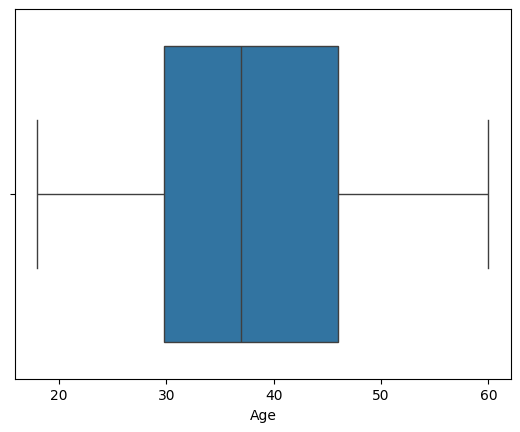

In [104]:
sns.boxplot( data=ds , x="Age" )

<Axes: xlabel='EstimatedSalary'>

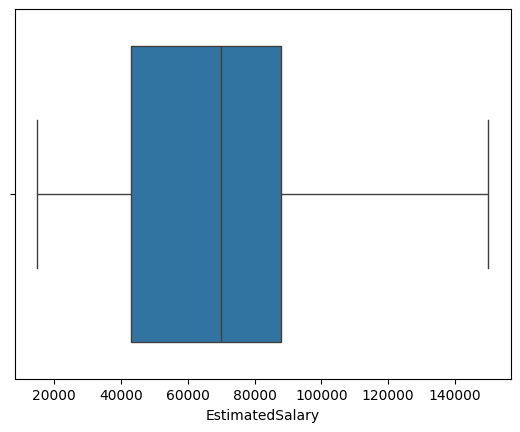

In [105]:
sns.boxplot( data=ds , x="EstimatedSalary" )

In [106]:
ds[ "Gender" ].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

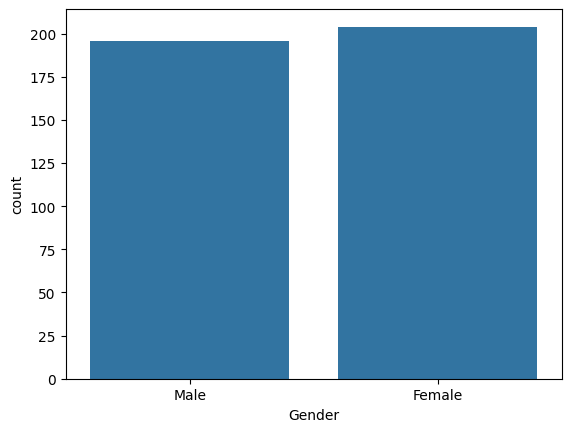

In [107]:
sns.countplot( data=ds , x="Gender" )

In [108]:
ds[ "Purchased" ].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

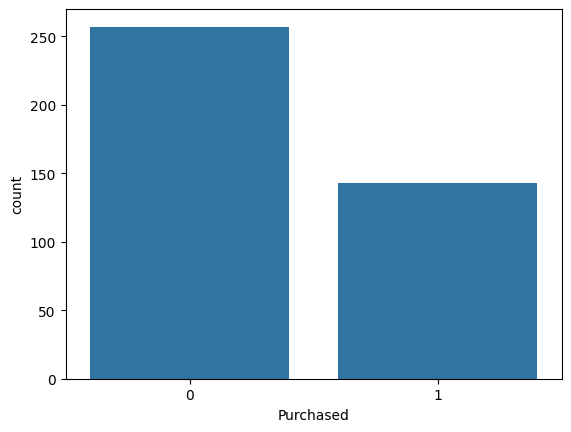

In [109]:
sns.countplot( data=ds , x="Purchased" )

### 1.2. Missing Values

In [110]:
ds.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### 1.3. Feature Encoding

In [111]:
ds.loc[ ds[ "Gender" ] == "Male" , "Gender" ] = 0
ds.loc[ ds[ "Gender" ] == "Female" , "Gender" ] = 1

In [112]:
ds = ds.astype( { "Gender" : "int" } )

### 1.3. Feature Elimination

In [113]:
# Remove user-id as it is the unique key
ds.drop( [ "User ID" ] , axis=1 , inplace=True )

### 1.4. Normalization


In [120]:
def min_max( feature ):
    ds[ feature ] = ( ds[feature] - ds[feature].min() ) / ( ds[feature].max() - ds[feature].min() ) 

min_max( "EstimatedSalary" )
min_max( "Age" )

### 1.5. Transformation


In [114]:
ds[ [ "Age" , "EstimatedSalary" ] ].skew()

Age                0.231337
EstimatedSalary    0.495024
dtype: float64

In [117]:
np.cbrt( ds[ "Age" ] ).skew()

-0.15234622354964228

In [118]:
np.cbrt( ds[ "Age" ] ).kurtosis()

-0.61004730223878

In [119]:
ds[ [ "Age" , "EstimatedSalary" ] ].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


## 2. Model Selection

In [124]:
from sklearn.model_selection import train_test_split

y = ds[ "Purchased" ].to_numpy()
X = ds[ [ "EstimatedSalary" , "Age" , "Gender" ] ].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 )

y_train = np.expand_dims( y_train , axis=1 )
y_test = np.expand_dims( y_test , axis=1 )

In [125]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(268, 3)
(132, 3)
(268, 1)
(132, 1)


In [128]:
def logistic_func( x: float ) -> float:
    return 1.0 / ( 1 + np.exp( -x ) )

def fit(
    train_x,
    train_y
):

    n_samples = train_x.shape[0]
    n_features = train_x.shape[1]
    parameters = np.random.uniform( size=( n_features , 1 ) )

    # TODO: Implement custom training loop

In [130]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit( X_train , y_train )
pred_y = clf.predict( X_test )

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
from sklearn.metrics import classification_report

print( classification_report( y_test , pred_y ) )

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        89
           1       0.89      0.56      0.69        43

    accuracy                           0.83       132
   macro avg       0.85      0.76      0.79       132
weighted avg       0.84      0.83      0.82       132

